In [119]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

from pandas import Series,DataFrame

In [12]:
#Checking Folder path
import os
folder="C:\\Users\\dyarrapu\\OneDrive - Itron\\Desktop\\Dileep Info\\Test"
if (os.getcwd()==folder):
    print("Folder path is same")
else:
    os.chdir(folder)
    print("Folder path changed to: ",folder)
    

Folder path is same


In [22]:
#Import Dataset 
df=pd.read_csv("Election_Result_All.csv",header=[0])
# Print first few rows
df.head(5)

,PC Name,No,Type,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %,Year
0,Adilabad,35,GEN,Andhra Pradesh,Dr. S. Venugopal Chary,Telugu Desam,"10,94,868","7,70,154",70.30%,"1,09,723",14.20%,1999
1,Adoor,17,SC,Kerala,Kodikunnil Suresh,Indian National Congress,"10,07,138","7,03,008",69.80%,"22,006",3.10%,1999
2,Agra,73,GEN,Uttar Pradesh [1947 - 1999],Raj Babbar,Samajwadi Party,"12,50,278","6,42,572",51.40%,"1,12,982",17.60%,1999
3,Ahmedabad,10,GEN,Gujarat,Harin Pathak,Bharatiya Janta Party,"13,20,165","5,27,744",40.00%,"52,968",10.00%,1999
4,Ahmednagar,39,GEN,Maharashtra,Dilipkumar Mansukhlal Gandhi,Bharatiya Janta Party,"11,47,112","7,75,866",67.60%,"28,457",3.70%,1999


In [36]:
# chaging column names to upper case and removing spaces in column names
df.columns=df.columns.str.upper()
df.columns=df.columns.str.replace(' ','')
df.columns

Index(['PCNAME', 'NO', 'TYPE', 'STATE', 'WINNINGCANDIDATE', 'PARTY',
       'ELECTORS', 'VOTES', 'TURNOUT', 'MARGIN', 'MARGIN%', 'YEAR'],
      dtype='object')

In [37]:
df.describe()

,NO,YEAR
count,2172.000000,2172.000000
mean,19.557551,2006.500000
std,16.947827,5.591457
min,1.000000,1999.000000
25%,6.000000,2002.750000
50%,15.000000,2006.500000
75%,28.000000,2010.250000
max,85.000000,2014.000000


In [39]:
df.describe(include=['object'])

,PCNAME,TYPE,STATE,WINNINGCANDIDATE,PARTY,ELECTORS,VOTES,TURNOUT,MARGIN,MARGIN%
count,2172,2172,2172,2172,2172,2172,2172,2172,2172,2172
unique,697,3,40,1792,66,2171,2168,499,2169,380
top,Hamirpur,GEN,Uttar Pradesh [2000 Onwards],Mulayam Singh Yadav,Bharatiya Janta Party,1499673,"7,56,275",59.40%,"59,197",3.20%
freq,8,1673,240,6,718,2,2,14,2,21


In [40]:
df.dtypes

PCNAME              object
NO                   int64
TYPE                object
STATE               object
WINNINGCANDIDATE    object
PARTY               object
ELECTORS            object
VOTES               object
TURNOUT             object
MARGIN              object
MARGIN%             object
YEAR                 int64
dtype: object

In [81]:
#removing ',' from below columns
df[['ELECTORS','VOTES','MARGIN']]=df[['ELECTORS','VOTES','MARGIN']].applymap(lambda x:x.replace(',',''))
df[['ELECTORS','VOTES','MARGIN']].head()

,ELECTORS,VOTES,MARGIN
0,1094868,770154,109723
1,1007138,703008,22006
2,1250278,642572,112982
3,1320165,527744,52968
4,1147112,775866,28457


In [85]:
#convertin below columns to int data type
df[['ELECTORS','VOTES','MARGIN']]=df[['ELECTORS','VOTES','MARGIN']].astype(int)
df.dtypes

,PCNAME,NO,TYPE,STATE,WINNINGCANDIDATE,PARTY,ELECTORS,VOTES,TURNOUT,MARGIN,MARGIN%,YEAR
0,Adilabad,35,GEN,Andhra Pradesh,Dr. S. Venugopal Chary,Telugu Desam,1094868,770154,70.30%,109723,14.20%,1999
1,Adoor,17,SC,Kerala,Kodikunnil Suresh,Indian National Congress,1007138,703008,69.80%,22006,3.10%,1999
2,Agra,73,GEN,Uttar Pradesh [1947 - 1999],Raj Babbar,Samajwadi Party,1250278,642572,51.40%,112982,17.60%,1999
3,Ahmedabad,10,GEN,Gujarat,Harin Pathak,Bharatiya Janta Party,1320165,527744,40.00%,52968,10.00%,1999
4,Ahmednagar,39,GEN,Maharashtra,Dilipkumar Mansukhlal Gandhi,Bharatiya Janta Party,1147112,775866,67.60%,28457,3.70%,1999


In [99]:
#Remove % in both columns and Rename Trunout column
df[['TURNOUT','MARGIN%']]=df[['TURNOUT','MARGIN%']].applymap(lambda x:x.replace('%',''))
df.rename(columns={'TURNOUT':'TURNOUT%'},inplace=True)

df.head()

,PCNAME,NO,TYPE,STATE,WINNINGCANDIDATE,PARTY,ELECTORS,VOTES,TURNOUT%,MARGIN,MARGIN%,YEAR
0,Adilabad,35,GEN,Andhra Pradesh,Dr. S. Venugopal Chary,Telugu Desam,1094868,770154,70.30,109723,14.20,1999
1,Adoor,17,SC,Kerala,Kodikunnil Suresh,Indian National Congress,1007138,703008,69.80,22006,3.10,1999
2,Agra,73,GEN,Uttar Pradesh [1947 - 1999],Raj Babbar,Samajwadi Party,1250278,642572,51.40,112982,17.60,1999
3,Ahmedabad,10,GEN,Gujarat,Harin Pathak,Bharatiya Janta Party,1320165,527744,40.00,52968,10.00,1999
4,Ahmednagar,39,GEN,Maharashtra,Dilipkumar Mansukhlal Gandhi,Bharatiya Janta Party,1147112,775866,67.60,28457,3.70,1999


In [104]:
#convertin fdata type to float
df[['TURNOUT%','MARGIN%']]=df[['TURNOUT%','MARGIN%']].astype(float)

In [107]:
df.dtypes

PCNAME               object
NO                    int64
TYPE                 object
STATE                object
WINNINGCANDIDATE     object
PARTY                object
ELECTORS              int32
VOTES                 int32
TURNOUT%            float64
MARGIN                int32
MARGIN%             float64
YEAR                  int64
dtype: object

In [105]:
#Checking NUll values if any
df.isnull().sum() # 0 null values

PCNAME              0
NO                  0
TYPE                0
STATE               0
WINNINGCANDIDATE    0
PARTY               0
ELECTORS            0
VOTES               0
TURNOUT%            0
MARGIN              0
MARGIN%             0
YEAR                0
dtype: int64

In [112]:
df.isnull().values.any()

False

In [136]:
df['YEAR'].value_counts()

2009    543
1999    543
2014    543
2004    543
Name: YEAR, dtype: int64

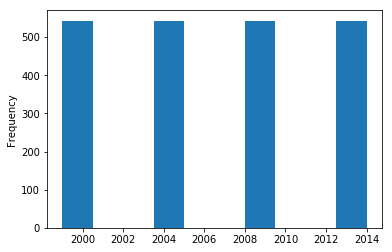

In [137]:
#plot total records for each election year
df['YEAR'].plot(kind='hist')

In [146]:
df[df["YEAR"]==2009].groupby('PARTY')['WINNINGCANDIDATE'].count()

PARTY
All India Anna Dravida Munnetra Kazhagam      9
All India Forward Bloc                        2
All India Majlis-E-Ittehadul Muslimoon        1
All India Trinamool Congress                 19
Asom Gana Parisad                             1
Assam United Democratic Front                 1
Bahujan Samaj Party                          21
Bahujan Vikas Aaghadi                         1
Bharatiya Janta Party                       116
Biju Janata Dal                              14
Bodaland Peoples Front                        1
Communist Party Of India                      4
Communist Party Of India (MARXIST)           16
Dravida Munetra Kazhagam                     18
Haryana Janhit Congress (BL)                  1
Independent                                   9
Indian National Congress                    206
Jammu & Kashmir National Conference           3
Janata Dal (Secular)                          3
Janata Dal (United)                          20
Jharkhand Mukti Morcha            

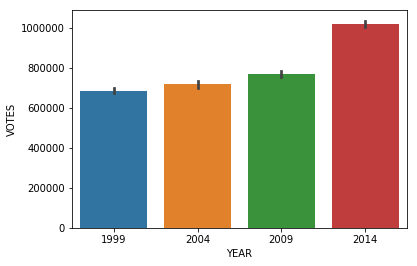

In [210]:
#Count of votes for each election year
sns.barplot(x="YEAR",y="VOTES", data=df)

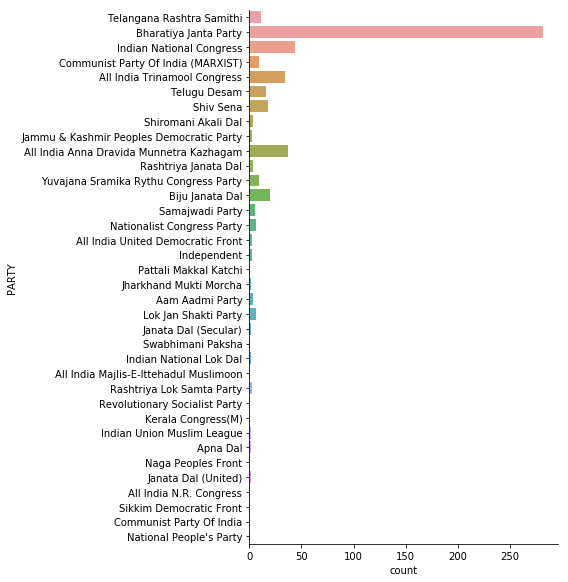

In [286]:
#Winning candidates for each party
df_2014=df[df["YEAR"]==2014]
df_2014.head()
sns.catplot(y='PARTY',data=df_2014,kind='count',alpha=0.9, height=8, aspect=1)


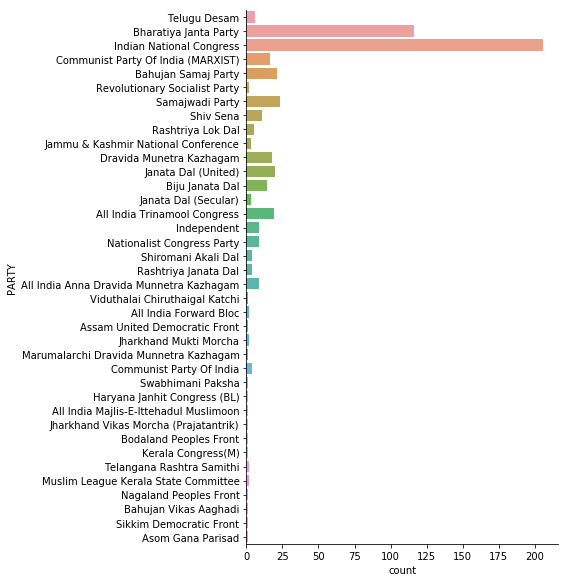

In [288]:
df_2009=df[df["YEAR"]==2009]
df_2009.head()
sns.catplot(y='PARTY',data=df_2009,kind='count',alpha=0.9, height=8, aspect=1)

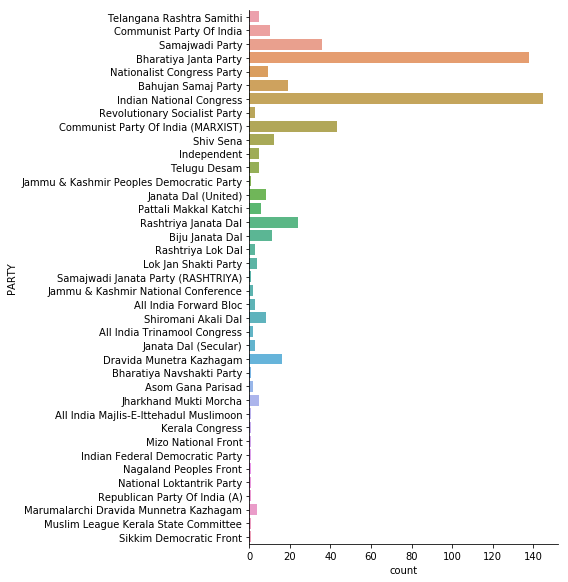

In [289]:
df_2004=df[df["YEAR"]==2004]
df_2004.head()
sns.catplot(y='PARTY',data=df_2004,kind='count',alpha=0.9, height=8, aspect=1)

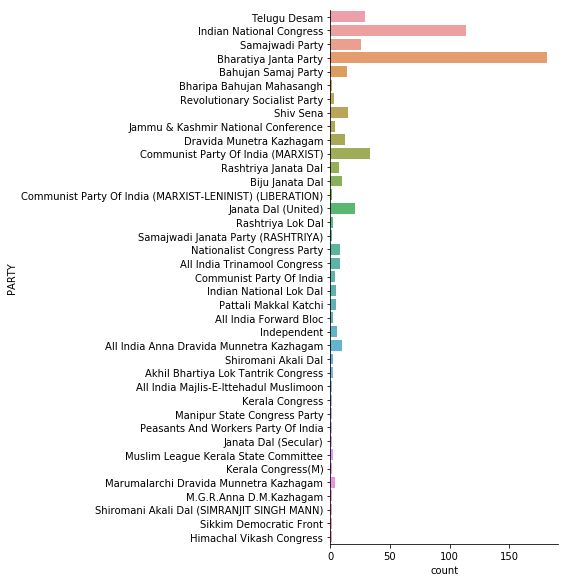

In [290]:
df_1999=df[df["YEAR"]==1999]
df_1999.head()
sns.catplot(y='PARTY',data=df_1999,kind='count',alpha=0.9, height=8, aspect=1)